# Business Problem: Optimizing Food Delivery Time Predictions
Problem Statement:

Customers expect accurate delivery time estimates when ordering food online. However, many factors—such as weather, traffic conditions, restaurant preparation time, and distance—affect actual delivery times. If a company can predict delivery times more accurately, it can improve customer satisfaction, driver efficiency, and operational planning.

# **Table of Contents**

1. [Introduction](#Introduction)
2. [Dataset](#Dataset)
3. [Data Loading and Cleaning](#Data-Loading-and-Cleaning)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
6. [Modeling and Prediction](#Modeling-and-Prediction)


# Introduction
In this project, we aim to analyze and predict delivery times for food orders based on various features such as weather, traffic, and distance. The analysis will include:
- Exploratory Data Analysis (EDA) to understand patterns and insights in the data.
- Predictive modeling to estimate delivery times using machine learning techniques.

# Dataset
- **Source**: https://www.kaggle.com/datasets/gautamdeora7/food-delivery-time-a-multi-factor-dataset/data
- **Number of Rows**: 10,001 rows
- **Number of Columns**: 18 features
- Key Features:
  - `ID`: A unique identifier for each delivery instance, used to distinguish individual records.
  - `Delivery_person_ID`: A unique identifier assigned to each delivery person for tracking purposes.
  - `Delivery_person_Age`: Age of the delivery person, potentially influencing delivery efficiency.
  - `Delivery_person_Ratings`: Customer ratings for the delivery person, reflecting performance and service quality.
  - `Restaurant_latitude`: Geographical latitude coordinate of the restaurant's location.
  - `Restaurant_longitude`: Geographical longitude coordinate of the restaurant's location.
  - `Delivery_location_latitude`: Latitude coordinate of the delivery location where the order is delivered.
  - `Delivery_location_longitude`: Longitude coordinate of the delivery location for the order.
  - `Type_of_order`: Category of food ordered (e.g., meal, snacks, drinks, buffet) to analyze preparation times.
  - `Type_of_vehicle`: The vehicle used for delivery (e.g., scooter, motorcycle, cycle, EV scooter), which affects speed and travel time.
  - `Temperature`: Ambient temperature during the delivery time, potentially impacting delivery efficiency.
  - `Humidity`: Level of atmospheric moisture during delivery, affecting conditions for travel.
  - `Precipitation`: Amount of rainfall or snow, indicating weather disruptions during delivery.
  - `Weather_description`: Textual description of the weather (e.g., sunny, cloudy, stormy) for context in travel conditions.
  - `Traffic_Level`: Severity of traffic congestion during the delivery (e.g., low, medium, high).
  - `Distance (km)`: The calculated distance between the restaurant and the delivery location in kilometers.
  - `TARGET`: The target variable representing the delivery time in minutes for model predictions.



# Data Loading and Cleaning

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector
import warnings
warnings.filterwarnings('ignore')

In [144]:
df = pd.read_csv('./Food_Time_Data_Set.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  object 
 1   Delivery_person_ID           10000 non-null  object 
 2   Delivery_person_Age          10000 non-null  float64
 3   Delivery_person_Ratings      10000 non-null  float64
 4   Restaurant_latitude          10000 non-null  float64
 5   Restaurant_longitude         10000 non-null  float64
 6   Delivery_location_latitude   10000 non-null  float64
 7   Delivery_location_longitude  10000 non-null  float64
 8   Type_of_order                10000 non-null  object 
 9   Type_of_vehicle              10000 non-null  object 
 10  temperature                  9995 non-null   float64
 11  humidity                     9995 non-null   float64
 12  precipitation                9995 non-null   float64
 13  weather_descript

In [146]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Unnamed: 14,Distance (km)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9995.000000,9995.000000,9995.000000,0.0,9080.000000
mean,29.522000,4.629370,16.893418,70.177749,17.412655,70.880072,22.936907,66.164882,0.016233,NaN,14.292747
std,5.700348,0.322941,8.330948,23.203352,7.336846,21.174585,3.379448,15.602939,0.074911,NaN,8.376254
min,15.000000,1.000000,-30.902872,-88.352885,0.010000,0.010000,6.770000,27.000000,0.000000,NaN,1.550000
25%,25.000000,4.500000,12.913041,73.170937,12.983959,73.753278,20.140000,54.000000,0.000000,NaN,7.620000
50%,29.000000,4.700000,18.546258,75.902847,18.626216,76.022574,23.000000,67.000000,0.000000,NaN,13.400000
75%,34.000000,4.800000,22.727021,78.047717,22.785089,78.128092,25.980000,81.000000,0.000000,NaN,19.610000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,29.050000,94.000000,1.460000,NaN,59.840000


In [147]:
df.describe(include='object')

,ID,Delivery_person_ID,Type_of_order,Type_of_vehicle,weather_description,Traffic_Level,TARGET
count,10000,10000,10000,10000,9995,9085,9459
unique,9995,1285,4,4,11,5,3389
top,6.00E+02,SURRES16DEL01,Snack,motorcycle,clear sky,High,#VALUE!
freq,2,22,2551,5862,3260,2736,419


In [148]:
# Checking the columns' names
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'temperature', 'humidity', 'precipitation', 'weather_description',
       'Unnamed: 14', 'Traffic_Level', 'Distance (km)', 'TARGET'],
      dtype='object')

In [149]:
# Droping the 'Unnamed :14' since all the rows are null.
df.drop('Unnamed: 14', axis=1, inplace=True)
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.89,43.45


In [150]:
# We also don't need these colunms
df.drop(columns=['ID', 'Delivery_person_ID'], inplace=True)

In [151]:
df["TARGET"].value_counts().head()

,count
TARGET,
#VALUE!,419
33.36666667,12
29.88333333,11
30.53333333,11
34.8,11


In [152]:
df["TARGET"].replace("#VALUE!", np.nan, inplace=True)
df["TARGET"] = df["TARGET"].astype(float)

In [153]:
# Filling the missing values median for numerical features and mode for categoricals
numerics = df.select_dtypes(include=float).columns
categoricals = df.select_dtypes(include=object).columns

for c in numerics:
    df[c] = df[c].fillna(df[c].median())

for c in categoricals:
    df[c] = df[c].fillna(df[c].mode()[0])

<Axes: >

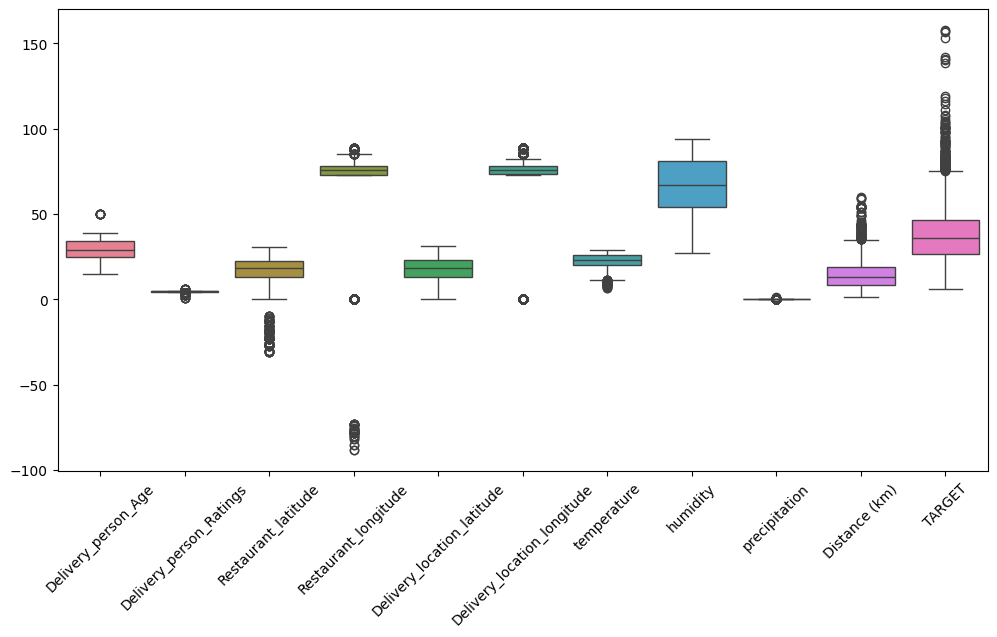

In [154]:
# Checking for outliers
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)

sns.boxplot(data=df)

<Axes: xlabel='Distance (km)'>

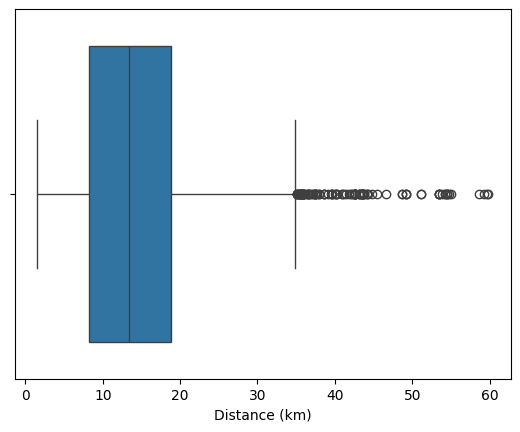

In [155]:
sns.boxplot(data=df, x="Distance (km)")

<Axes: xlabel='TARGET'>

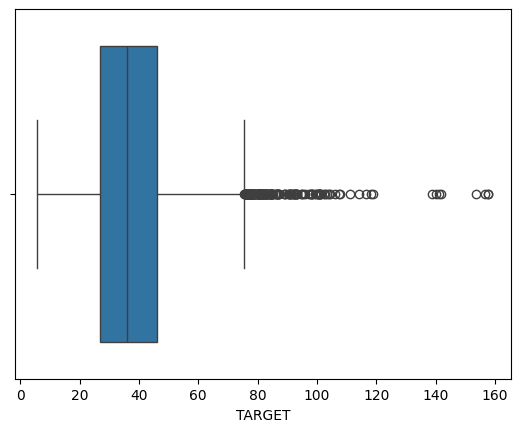

In [156]:
sns.boxplot(data=df, x="TARGET")

In [157]:
# All late deliveries were caused by heavy traffic conditions
df.loc[df["TARGET"] > 100]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
22,33.0,4.3,12.986047,80.218114,13.116047,80.348114,Meal,scooter,26.45,87.0,0.0,scattered clouds,Very High,27.52,101.000000
270,22.0,4.7,12.986047,80.218114,13.096047,80.328114,Snack,scooter,26.47,87.0,0.0,broken clouds,Very High,25.39,100.650000
335,39.0,4.4,12.986047,80.218114,13.096047,80.328114,Drinks,scooter,26.47,87.0,0.0,broken clouds,Very High,25.39,105.950000
444,37.0,4.7,30.362686,78.068890,30.492686,78.198890,Buffet,scooter,12.01,81.0,0.0,clear sky,Very High,54.27,140.983333
564,36.0,4.8,30.359722,78.067079,30.499722,78.207079,Buffet,motorcycle,9.18,82.0,0.0,clear sky,Very High,59.67,157.750000
1013,28.0,4.8,12.981615,80.231598,13.111615,80.361598,Buffet,motorcycle,26.46,87.0,0.0,scattered clouds,Very High,30.25,100.283333
1651,31.0,4.9,30.362686,78.068890,30.502686,78.208890,Buffet,scooter,9.18,82.0,0.0,clear sky,Very High,59.31,157.533333
2182,35.0,4.3,30.346994,78.062543,30.486994,78.202543,Meal,scooter,12.01,81.0,0.0,clear sky,Very High,49.15,114.316667
2194,32.0,4.1,19.176269,72.836721,19.306269,72.966721,Buffet,motorcycle,27.05,49.0,0.0,clear sky,Very High,42.66,101.233333
2258,22.0,4.7,30.342509,78.061187,30.472509,78.191187,Buffet,motorcycle,8.79,81.0,0.0,clear sky,Very High,43.24,104.050000


#Exploratory Data Analysis (EDA)

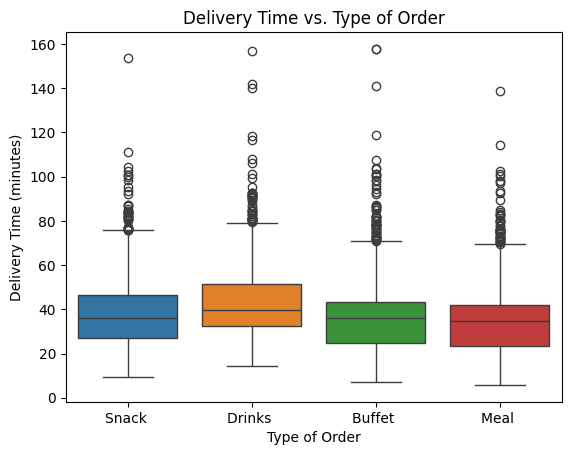

In [159]:
sns.boxplot(df, x='Type_of_order', y='TARGET', palette = 'tab10')

plt.title('Delivery Time vs. Type of Order')
plt.ylabel('Delivery Time (minutes)')
plt.xlabel('Type of Order')

plt.show()

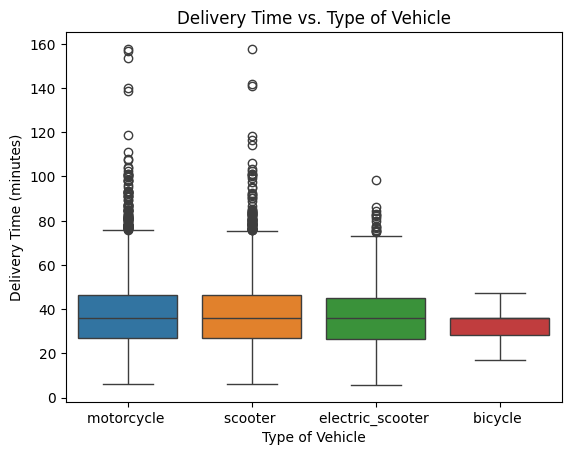

In [160]:
sns.boxplot(df, x='Type_of_vehicle', y='TARGET', palette = 'tab10')

plt.title('Delivery Time vs. Type of Vehicle')
plt.ylabel('Delivery Time (minutes)')
plt.xlabel('Type of Vehicle')

plt.show()

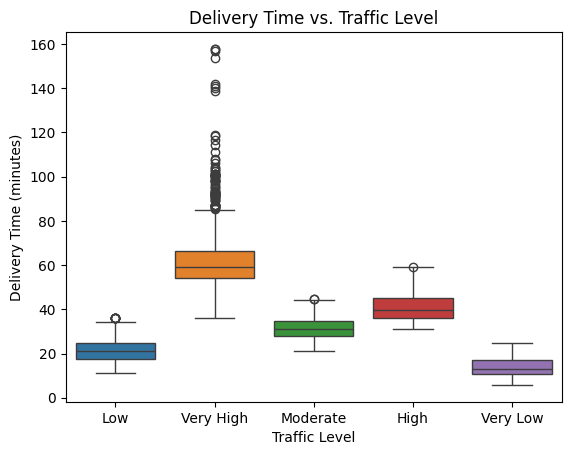

In [161]:
sns.boxplot(df, x='Traffic_Level', y='TARGET', palette = 'tab10')

plt.title('Delivery Time vs. Traffic Level')
plt.ylabel('Delivery Time (minutes)')
plt.xlabel('Traffic Level')

plt.show()

In [162]:
fig = px.scatter(df, x='Distance (km)', y='TARGET', color='weather_description')
fig.update_layout(title='Delivery Time vs. Distance by Weather Description', yaxis_title='Delivery Time (minutes)', xaxis_title='Distance (km)')
fig.show(renderer='colab');

In [163]:
fig = px.scatter(df, x='Distance (km)', y='TARGET', color='Traffic_Level')
fig.update_layout(title='Delivery Time vs. Distance by Traffic Level', yaxis_title='Delivery Time (minutes)', xaxis_title='Distance (km)')
fig.show(renderer='colab');

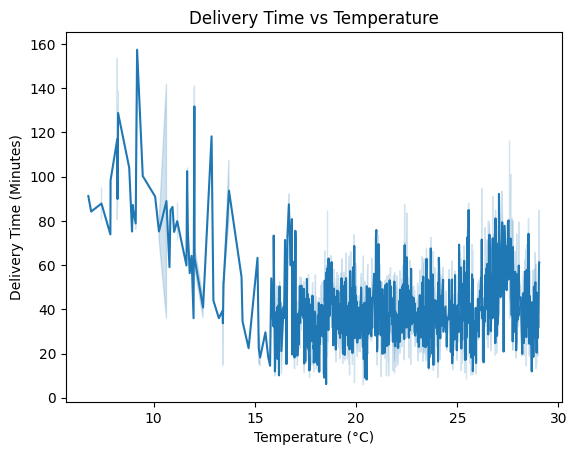

In [164]:
sns.lineplot(data=df, x='temperature', y='TARGET')

plt.title('Delivery Time vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Delivery Time (Minutes)')

plt.show()

In [165]:
label = LabelEncoder()
nominals = ['Type_of_order', 'Type_of_vehicle', 'weather_description']

for c in nominals:
  df[c] = label.fit_transform(df[c])

ordinal = OrdinalEncoder(categories=[['Very Low', 'Low', 'Moderate', 'High', 'Very High']])
df['Traffic_Level'] = ordinal.fit_transform(df[['Traffic_Level']])

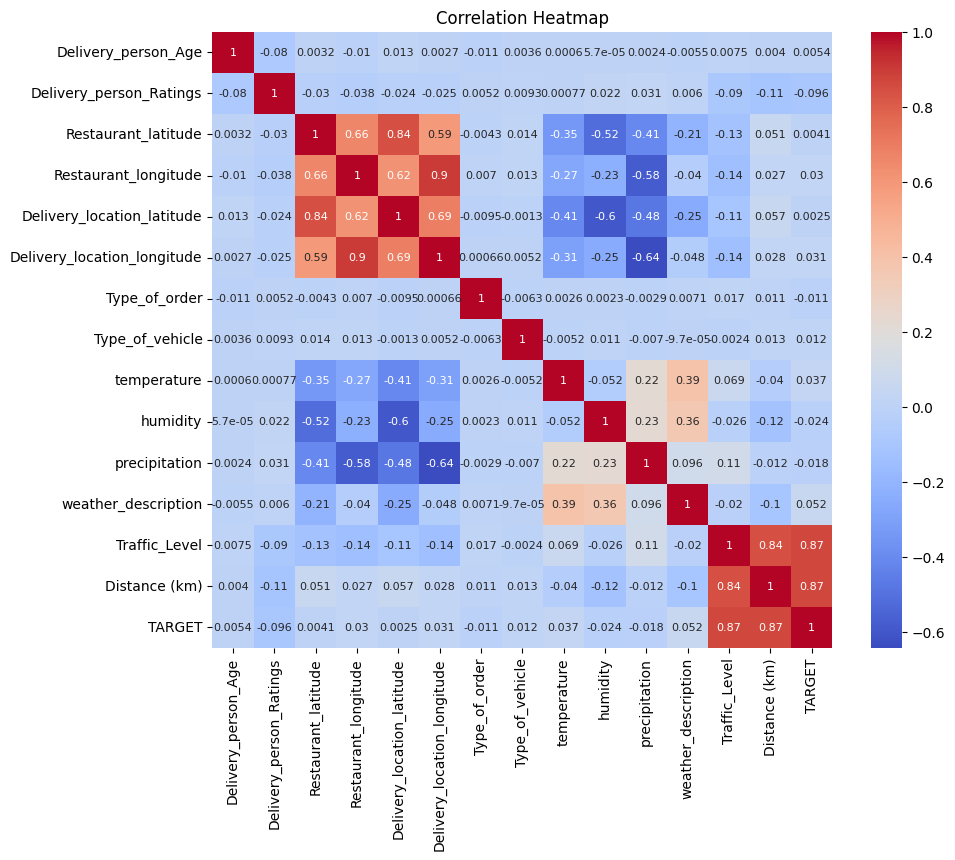

In [166]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap')

plt.show()

# Modelling and Prediction

In [167]:
x = df.drop(columns="TARGET", axis = 1)
y = df["TARGET"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [169]:
# Normalizing
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [170]:
x_train.shape, y_train.shape

((8000, 14), (8000,))

In [171]:
# Trains multiple regression models and evaluates their performance. Returns a Dataframe containing metrics for all models
def train_models(x_train, x_test, y_train, y_test):
  results = []

  models = {
      "Linear Regression": LinearRegression(),
      "Decision Tree": DecisionTreeRegressor(),
      "Random Forest": RandomForestRegressor(),
      "SVR": SVR()}

  for model_name, model in models.items():
      model.fit(x_train, y_train)
      y_pred = model.predict(x_test)

      mae = mean_absolute_error(y_test, y_pred)
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      results.append({"Model": model_name, "MAE": mae, "MSE": mse, "R-squared": r2
        })

  results_df = pd.DataFrame(results)
  return results_df

In [172]:
results = train_models(x_train, x_test, y_train, y_test)
results

,Model,MAE,MSE,R-squared
0,Linear Regression,4.387109,36.123637,0.845448
1,Decision Tree,2.893786,20.361408,0.912886
2,Random Forest,2.213812,10.254692,0.956126
3,SVR,4.037134,38.075399,0.837098


# Feature Selection & GridSearch

In [174]:
models_with_params = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {
            "fit_intercept": [True, False],
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "SVR": {
        "model": SVR(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    }
}

In [175]:
def train_with_gridsearch(x_train, x_test, y_train, y_test):
  results = []

  for model_name, config in models_with_params.items():
      print(f"Training: {model_name}")

      grid_search = GridSearchCV(
          estimator=config["model"],
          param_grid=config["params"],
          scoring="neg_mean_squared_error",
          cv=5,
          n_jobs=-1
        )

      grid_search.fit(x_train, y_train)
      best_model = grid_search.best_estimator_

      y_pred = best_model.predict(x_test)

      mae = mean_absolute_error(y_test, y_pred)
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      results.append({
          "Model": model_name,
          "Best Params": grid_search.best_params_,
          "MAE": mae,
          "MSE": mse,
          "R-squared": r2
      })

  results_df = pd.DataFrame(results)
  return results_df

In [176]:
results = train_with_gridsearch(x_train, x_test, y_train, y_test)
results

Training: Linear Regression
Training: Decision Tree
Training: Random Forest
Training: SVR


,Model,Best Params,MAE,MSE,R-squared
0,Linear Regression,{'fit_intercept': True},4.387109,36.123637,0.845448
1,Decision Tree,"{'max_depth': 10, 'min_samples_split': 5}",2.640251,15.831032,0.932268
2,Random Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",2.202539,10.090767,0.956828
3,SVR,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",3.156388,20.513269,0.912236
